# Multiple linear regression - Matrix design- vectorization 

In [66]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [67]:
from sklearn import datasets


from sklearn.datasets import load_boston
dataset = load_boston()

X=dataset.data
Y=dataset.target
print(X.shape)

dataset.feature_names



(506, 13)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [68]:
from sklearn.datasets import make_regression
X,Y=make_regression(n_samples=500)

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = .33, random_state = 0)

In [70]:
def predict(X,theta,theta0):
    return X.dot(theta)+theta0

In [71]:
def CostFunction(y, y_hat):
    cost = np.sum((y_hat - y) ** 2) / (len(y))
    return cost

In [72]:
theta=np.zeros(X_train.shape[1],dtype=np.float32)
theta0=0.
theta,theta0,cost_=GradientDescent(X_train,y_train,theta,theta0,0.3,100)

Cost is: 15772.54907483781
Cost is: 150.10740477669307
Cost is: 15.476793520542707
Cost is: 2.4528032587991366
Cost is: 0.47043165624621847
Cost is: 0.10105853250025834
Cost is: 0.023394708622196787
Cost is: 0.005697715204032467
Cost is: 0.0014364602862767986
Cost is: 0.00037076855475041954


335


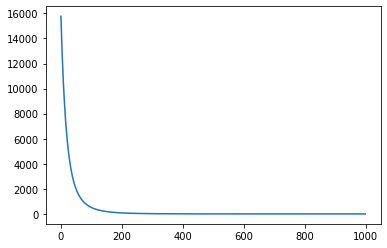

In [73]:
def fit1(X_train,y_train,lr=0.3,epochs=10):
    theta=np.zeros(X_train.shape[1],dtype=np.float32)
    theta0=np.zeros(1)
    err=[]
    n=X_train.shape[0]
    print(n)
    for i in range(epochs):
       
        y_hat=predict(X_train,theta,theta0)
        loss = y_hat-y_train
        d_theta=X_train.T.dot(loss)/n
        d_theta0=np.sum(loss)/n
      
        err.append(CostFunction(y_train,y_hat))
                                      
        theta=theta-lr* d_theta
        theta0=theta0-lr*d_theta0
    
    ##print(list(range(epochs))
    plt.plot(list(range(epochs)),err)
    return theta,theta0


theta,theta0=fit1( X_train,y_train, lr=0.02,epochs=1000)
    



   32.502345269453031  31.70700584656992
0           53.426804          68.777596
1           61.530358          62.562382
2           47.475640          71.546632
3           59.813208          87.230925
4           55.142188          78.211518
(99,)


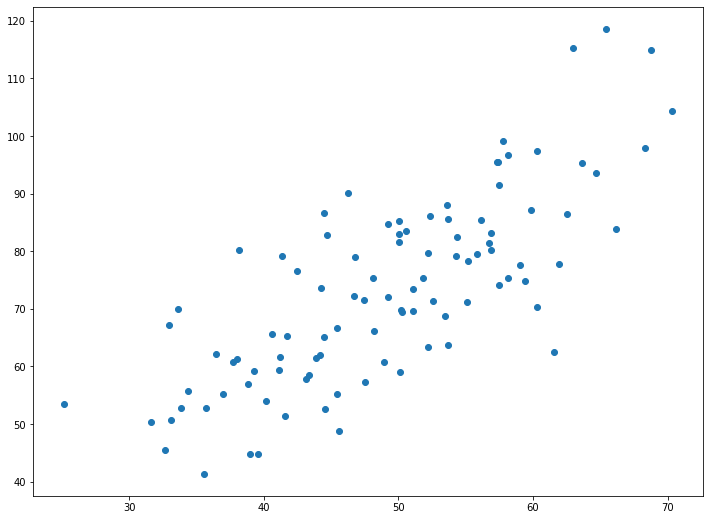

In [74]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
print(data.head())
X = data.iloc[:, 0] ## features 
Y = data.iloc[:, 1]  ## label - correct pred
print(X.shape)
plt.scatter(X, Y)
plt.show()

In [75]:
print(X.shape)

(99,)


In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 20, random_state = 0)
X_train.shape

(79,)

# Simple linear regression

In [77]:
def linear_prediction(theata0, theta1, x):
    return theata0+theta1*x

## train
def fit(X,Y,lr=0.01, epochs=1000):
    X=np.asarray(X)
    X.shape
    Y=np.asarray(Y)
    # initaizling theata 
    theta0=0
    theta1=0
    mls=[]
    for epoch in range(epochs):
        d_theta0=.0
        d_theta1=.0
        err=0
        for x, y in zip(X,Y):
            y_hat=linear_prediction(theta0, theta1,x)
            d_theta0=d_theta0+(y_hat-y)
            d_theta1=d_theta1+(y_hat-y)*x
            err+=np.abs((y_hat-y))
        mls.append(err)
        theta0=theta0/X.size
        theta0=theta0/Y.size
        theta0=theta0-(lr* d_theta0)
        theta1=theta1-(lr* d_theta1)
    print(mls[:20])
fit(X_train,X_test)        
        
   
    

[1052.4490807871614, 452016.4163374389, 205478430.28779396, 93394872148.39685, 42450220066419.9, 1.9294647994321572e+16, 8.769882479826659e+18, 3.9861229255182694e+21, 1.8117889280605708e+24, 8.235017286668547e+26, 3.743013805936151e+29, 1.7012899747167865e+32, 7.732772915455329e+34, 3.5147316360312815e+37, 1.5975302273042028e+40, 7.261159859227169e+42, 3.300372136946869e+45, 1.5000986692909106e+48, 6.818309948798921e+50, 3.099086180768738e+53]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [79]:
theta0=0
theta1=0
learning_rate=0.0001
epochs=1000
n=int(X.shape[0])
print(n)
for i in range(epochs):
   
    d_theta0=0.
    d_theta1=0.
    for j in range(n):
        x=X[j]
        y=Y[j]
        pred_y=theta0+theta1*x
        d_theta0 +=(pred_y-y)
        d_theta1 +=(pred_y-y)*x
    d_theta0 /=n
    d_theta1 /=n
    theta0=theta0-learning_rate*d_theta0
    theta1=theta1- learning_rate*d_theta1
print(theta0)
print(theta1)

99
0.06532711149394307
1.4803580552962574


In [ ]:
##x_axis=list(range(0,1000))
##plt.plot(x_axis,error_list)

In [80]:
def prediction(theta0, theta1, x):
    return theta0+(theta1*x)

# Making predictions
Y_pred=prediction(theta0,theta1,X_test )

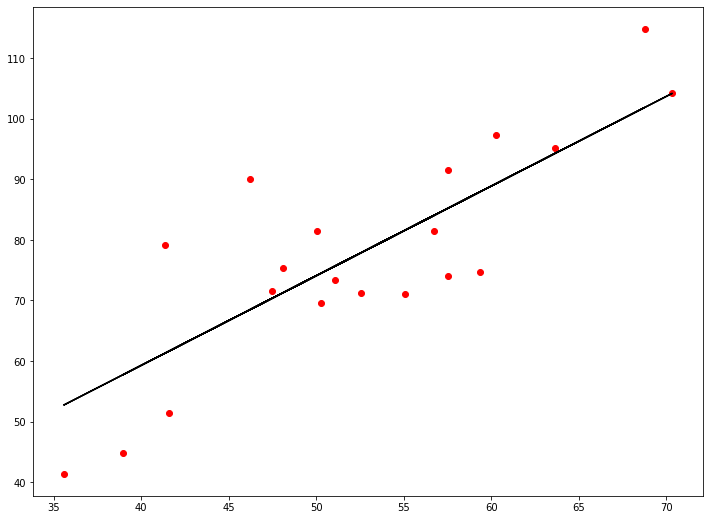

In [81]:

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test,Y_pred, color = 'black')
##plt.plot(X_train, prediction(theta0,theta1,X_train ), color = 'blue')


plt.show()